In [2]:
import pandas as pd
%pylab inline
from statsmodels.graphics.mosaicplot import mosaic

Populating the interactive namespace from numpy and matplotlib


In [3]:
def preprocess_data(df):
    columns_to_remove = ['PassengerId', 'Name', 'Ticket', 'Cabin']
    categorical_columns = ['Sex', 'Embarked']

    for c in columns_to_remove:
        df = df.drop(c, 1)

    age_median = df['Age'].median()
    df['Age'].fillna(age_median, inplace=True)

    fare_median = df['Fare'].median()
    df['Fare'].fillna(fare_median, inplace=True)

    return pd.get_dummies(df, dummy_na=True, columns=categorical_columns)


def load_data():
    return pd.read_csv('/Users/troy/code/machine-learning/titanic/data/train.csv')


def get_train(df):
    train = preprocess_data(df)
    train = train.drop('Survived', 1)
    return train


def get_target(df):
    return df['Survived']


def get_model():
    return RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)


def make_int(x):
    if x >= 0.50:
        return 1
    else:
        return 0

In [4]:
data = load_data()

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


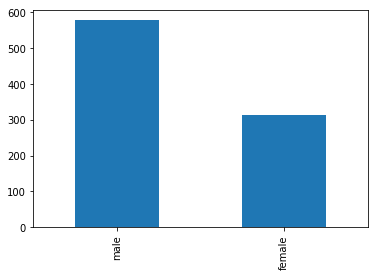

In [14]:
data.Sex.value_counts().plot(kind='bar')

(<matplotlib.figure.Figure at 0x114dba828>,
 OrderedDict([(('male', '0'),
               (0.0, 0.0, 0.6443651551445914, 0.8083971970957582)),
              (('male', '1'),
               (0.0,
                0.8117194562319708,
                0.6443651551445914,
                0.1882805437680291)),
              (('female', '0'),
               (0.6493402795227009,
                0.0,
                0.35065972047729926,
                0.25710476754766487)),
              (('female', '1'),
               (0.6493402795227009,
                0.2604270266838775,
                0.35065972047729926,
                0.7395729733161224))]))

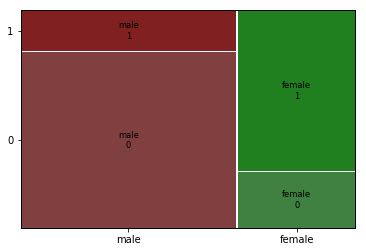

In [5]:
mosaic(data, ['Sex', 'Survived'])

(<matplotlib.figure.Figure at 0x10ec01cc0>,
 OrderedDict([(('3', '0'), (0.0, 0.0, 0.5456101165672124, 0.7551204065200181)),
              (('3', '1'),
               (0.0,
                0.7584426656562308,
                0.5456101165672124,
                0.2415573343437692)),
              (('1', '0'),
               (0.5505606116167173,
                0.0,
                0.24002400240024002,
                0.3691399040236249)),
              (('1', '1'),
               (0.5505606116167173,
                0.37246216315983754,
                0.24002400240024002,
                0.6275378368401624)),
              (('2', '0'),
               (0.7955351090664623,
                0.0,
                0.20446489093353776,
                0.5254225046944966)),
              (('2', '1'),
               (0.7955351090664623,
                0.5287447638307091,
                0.20446489093353776,
                0.4712552361692907))]))

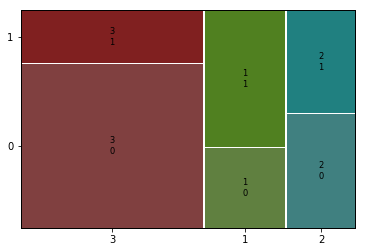

In [6]:
mosaic(data, ['Pclass', 'Survived'])

/Users/troy/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


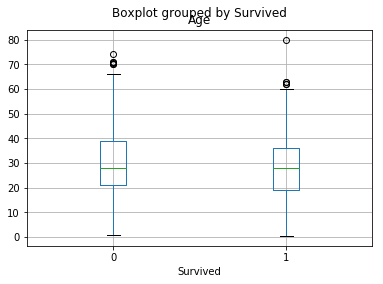

In [58]:
data.boxplot(column='Age', by='Survived')


/Users/troy/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


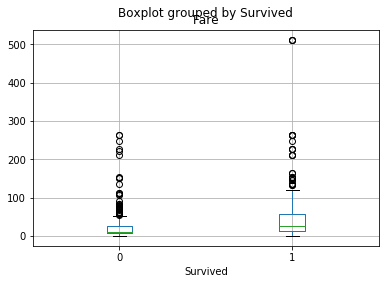

In [59]:
data.boxplot(column='Fare', by='Survived')

In [61]:
data['Fare_sqrt'] = data.apply(lambda row: sqrt(row['Fare']), axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_sqrt
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.692582
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,8.442944
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.815138
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,7.286975
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.837252


/Users/troy/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


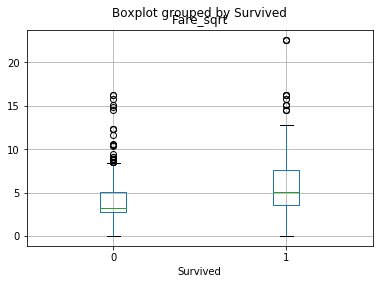

In [62]:
data.boxplot(column='Fare_sqrt', by='Survived')